# 타이타닉 호 탑승자 생존 예측 

```
타이타닉 호 탑승자 생존 예측 

titanic_train.txt (구분자: Tab, 891 Rows, 11 Columns)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
# file load
df = pd.read_csv('data/titanic_train.txt', delimiter='\t')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


```
분석에 시작하기에 앞서, titanic_train.txt 에 대해 다음과 같이 1:2 비율로 데이터를 나눈다.
(데이터셋 나누는 방법 : case when PassengerId%3 = 0 then '2' else '1' end class)
```

In [6]:
def some_func(x):
    if x % 3 == 0:
        return '2'
    else:
        return '1'

In [7]:
conditional_function = lambda x: '2' if x % 3 == 0 else '1'

In [8]:
conditional_function = some_func

In [12]:
conditional_function(5)

'1'

In [13]:
df['PassengerId'].apply(some_func)

0      1
1      1
2      2
3      1
4      1
      ..
886    1
887    2
888    1
889    1
890    2
Name: PassengerId, Length: 891, dtype: object

In [15]:
df['group'] = df['PassengerId'].apply(some_func)

In [16]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked group  
0      0         A/5 21171   7.2500   NaN        S     1  
1      0          PC 17599  71.2833   C85        C     1  
2      0  STON/O2. 3101282   7.9250   NaN        S     2  
3      0            113803  53.1000  C123        S     1  
4      0            373450   8.0500   NaN        S     1

In [17]:
train = df.loc[df['group'] == '1']
test = df.loc[df['group'] == '2']

## Q 1-1

```
training set으로 다음 분석을 수행하시오 

수치형 변수들에 대해 결측 건수를 확인할 때, 결측이 가장 많은 변수는 무엇이며, 그 변수의 결측치 개수는 얼마인가?

(답안예시) Pare, 123
```

In [18]:
# 수치형 변수 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 889
Data columns (total 13 columns):
PassengerId    594 non-null int64
Survived       594 non-null int64
Pclass         594 non-null int64
Name           594 non-null object
Sex            594 non-null object
Age            474 non-null float64
SibSp          594 non-null int64
Parch          594 non-null int64
Ticket         594 non-null object
Fare           594 non-null float64
Cabin          136 non-null object
Embarked       592 non-null object
group          594 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 65.0+ KB


In [20]:
# 수치형 컬럼 추출
numerical_cols = train.select_dtypes(exclude='object').columns
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
# 수치형 컬럼, 결측치 확인
train[numerical_cols].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            120
SibSp            0
Parch            0
Fare             0
dtype: int64

**정답: Age, 120**

## Q 1-2

```
범주형 변수의 결측/빈값을 확인할 때, 결측/빈값이 가장 많은 변수는 무엇이며, 결측/빈값의 개수는 얼마인가?

(답안예시) Embarked, 123
```

In [22]:
# 카테고리형 컬럼 추출
categorical_cols = train.select_dtypes(include='object').columns
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'group'], dtype='object')

In [23]:
# 카테고리형 컬럼, 결측치 확인
train[categorical_cols].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       458
Embarked      2
group         0
dtype: int64

**정답: Cabin, 458**

## Q 1-3

```
성별(sex)에 따른 생존률(survived=1인 비율)을 비교하기 위해 시각화 하시오. 
동일하게, Parch, sibsp, pclass, embarked, Age별로도 각각 생존률을 비교하기 위한 시각화를 수행하시오
```

In [27]:
# 성별(sex)에 따른 생존률(survived=1인 비율)을 비교하기 위해 시각화
# 코드입력
train.groupby('Sex')['Survived'].mean().plot(kind='bar')

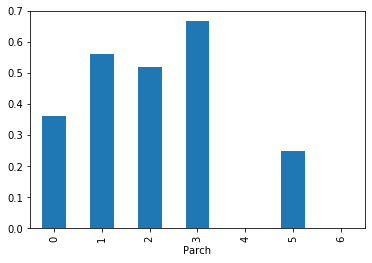

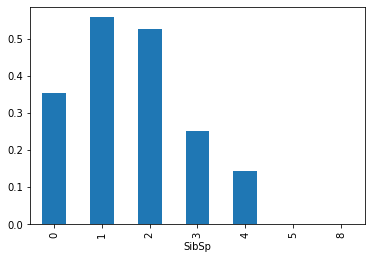

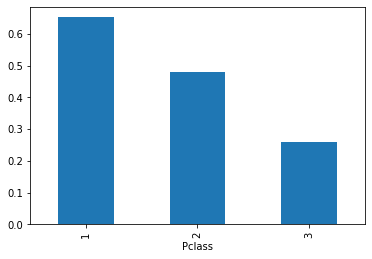

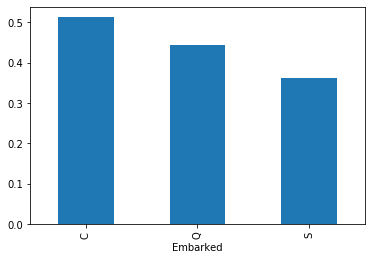

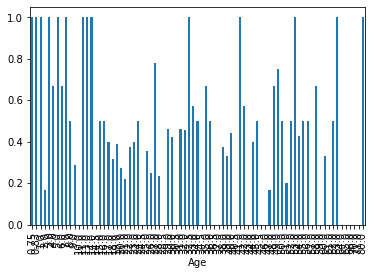

In [29]:
# Parch, sibsp, pclass, embarked, Age별로도 각각 생존률을 비교하기 위한 시각화
for col in ['Parch', 'SibSp', 'Pclass', 'Embarked', 'Age']:
    train.groupby(col)['Survived'].mean().plot(kind='bar')
    plt.show()

## Q 1-4

```
Age를 Age_group(0이상 18미만을 ‘child’, 18이상 54미만을 ‘grown’으로, 54이상을 ‘senior’로 함)으로 나누어 Age_group별로 생존률을 비교하기 위한 시각화를 수행하시오
```

In [30]:
# Age를 Age_group(0이상 18미만을 ‘child’, 18이상 54미만을 ‘grown’으로, 54이상을 ‘senior’로 함)으로 나누어
def age_bin(x):
    # 코드입력
    if x < 18:
        return 'child'
    elif x < 54:
        return 'grown'
    elif x >= 54:
        return 'senior'
    else:
        return np.nan

In [31]:
train['Age_Bin'] = train['Age'].apply(age_bin)
# test에도 동일하게 적용
test['Age_Bin'] = test['Age'].apply(age_bin)

In [32]:
train.head(10)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
3             4         1       1   
4             5         0       3   
6             7         0       1   
7             8         0       3   
9            10         1       2   
10           11         1       3   
12           13         0       3   
13           14         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   

    Parch     Ticket     Fare Cabin Embarked group Age_Bin  
0       0  A/5 21171   7.2500   NaN        S     1   grown  
1       0   PC 17599  71.2833   C85        C     1   grown  
3       0     113803  53.1000  C123        S     1   grown  
4       0     373450   8.0500   NaN        S     1   grown  
6       0      17463  51.8625   E46        S     1  senior  
7       1     349909  21.0750   NaN        S     1   child  
9       0     237736  30.0708   NaN        C     1   child  
10      1    PP 9549  16.7000    G6        S     1   child  
12      0  A/5. 2151   8.0500   NaN        S     1   grown  
13      5     347082  31.2750   NaN        S     1   grown

In [33]:
test.head(10)

PassengerId  Survived  Pclass  \
2             3         1       3   
5             6         0       3   
8             9         1       3   
11           12         1       1   
14           15         0       3   
17           18         1       2   
20           21         0       2   
23           24         1       1   
26           27         0       3   
29           30         0       3   

                                                 Name     Sex   Age  SibSp  \
2                              Heikkinen, Miss. Laina  female  26.0      0   
5                                    Moran, Mr. James    male   NaN      0   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
26                            Emir, Mr. Farred Chehab    male   NaN      0   
29                                Todoroff, Mr. Lalio    male   NaN      0   

    Parch            Ticket     Fare Cabin Embarked group Age_Bin  
2       0  STON/O2. 3101282   7.9250   NaN        S     2   grown  
5       0            330877   8.4583   NaN        Q     2     NaN  
8       2            347742  11.1333   NaN        S     2   grown  
11      0            113783  26.5500  C103        S     2  senior  
14      0            350406   7.8542   NaN        S     2   child  
17      0            244373  13.0000   NaN        S     2     NaN  
20      0            239865  26.0000   NaN        S     2   grown  
23      0            113788  35.5000    A6        S     2   grown  
26      0              2631   7.2250   NaN        C     2     NaN  
29      0            349216   7.8958   NaN        S     2     NaN

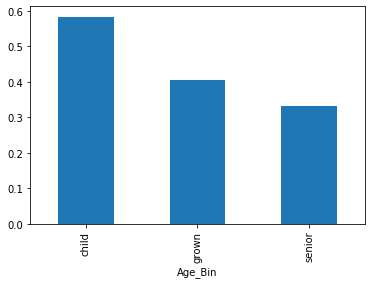

In [34]:
# Age_group별로 생존률을 비교하기 위한 시각화
# 코드입력
train.groupby('Age_Bin')['Survived'].mean().plot(kind='bar')

## Q 2

```
Embarked의 각 값별 Pclass의 비중을 비교하였을 때, Embarked가 C인 경우 가장 비중이 높은 Pclass, Q인 경우 가장 비중이 높은 Pclass, S인 경우 가장 비중이 높은 Pclass는 각각 무엇인가? 단, Pclass, Embarked가 빈값이 아닌 경우만을 대상으로 한다. 

(답안예시) 1,2,3
```

In [35]:
#  Embarked가 C인 경우 가장 비중이 높은 Pclass
train.loc[train['Embarked'] == 'C', 'Pclass'].value_counts()

1    59
3    46
2    10
Name: Pclass, dtype: int64

In [36]:
# Embarked가 Q인 경우 가장 비중이 높은 Pclass
train.loc[train['Embarked'] == 'Q', 'Pclass'].value_counts()

3    51
2     2
1     1
Name: Pclass, dtype: int64

In [37]:
# Embarked가 S인 경우 가장 비중이 높은 Pclass
train.loc[train['Embarked'] == 'S', 'Pclass'].value_counts()

3    227
2    117
1     79
Name: Pclass, dtype: int64

**정답: 1, 3, 3**

## Q 3-1

```
Embarked에 대해 빈 값 데이터 제거, Cabin 컬럼은 제거한 후, name 변수를 통해 title 변수를 생성하고 
Title이 'Mr', 'Mrs', 'Master', 'Miss'은 각각 'Mr', 'Mrs', 'Master', 'Miss'로 하고, 그 외는 'etc'로 하여 Title_group 변수를 생성하시오. 
```

In [22]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Cabin Embarked group Age_Bin  
0      0  A/5 21171   7.2500   NaN        S     1   grown  
1      0   PC 17599  71.2833   C85        C     1   grown  
3      0     113803  53.1000  C123        S     1   grown  
4      0     373450   8.0500   NaN        S     1   grown  
6      0      17463  51.8625   E46        S     1  senior

In [38]:
# Embarked에 대해 빈 값 데이터 제거
train_tmp = train.loc[train['Embarked'].notnull()]
train_tmp

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
3              4         1       1   
4              5         0       3   
6              7         0       1   
..           ...       ...     ...   
883          884         0       2   
885          886         0       3   
886          887         0       2   
888          889         0       3   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
..                                                 ...     ...   ...    ...   
883                      Banfield, Mr. Frederick James    male  28.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
886                              Montvila, Rev. Juozas    male  27.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch            Ticket     Fare Cabin Embarked group Age_Bin  
0        0         A/5 21171   7.2500   NaN        S     1   grown  
1        0          PC 17599  71.2833   C85        C     1   grown  
3        0            113803  53.1000  C123        S     1   grown  
4        0            373450   8.0500   NaN        S     1   grown  
6        0             17463  51.8625   E46        S     1  senior  
..     ...               ...      ...   ...      ...   ...     ...  
883      0  C.A./SOTON 34068  10.5000   NaN        S     1   grown  
885      5            382652  29.1250   NaN        Q     1   grown  
886      0            211536  13.0000   NaN        S     1   grown  
888      2        W./C. 6607  23.4500   NaN        S     1     NaN  
889      0            111369  30.0000  C148        C     1   grown  

[592 rows x 14 columns]

In [39]:
# Cabin 컬럼은 제거한 후
train_tmp = train_tmp.drop('Cabin', 1)# 코드입력
train_tmp.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Embarked group Age_Bin  
0      0  A/5 21171   7.2500        S     1   grown  
1      0   PC 17599  71.2833        C     1   grown  
3      0     113803  53.1000        S     1   grown  
4      0     373450   8.0500        S     1   grown  
6      0      17463  51.8625        S     1  senior

In [40]:
train_tmp['Name'].str.findall('\w+\.').str[0].value_counts()

Mr.          342
Miss.        125
Mrs.          89
Master.       23
Rev.           3
Dr.            3
Don.           1
Mme.           1
Capt.          1
Col.           1
Countess.      1
Lady.          1
Jonkheer.      1
Name: Name, dtype: int64

In [41]:
train_tmp['Title'] = train_tmp['Name'].str.findall('\w+\.').str[0]

In [42]:
train_tmp.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Embarked group Age_Bin Title  
0      0  A/5 21171   7.2500        S     1   grown   Mr.  
1      0   PC 17599  71.2833        C     1   grown  Mrs.  
3      0     113803  53.1000        S     1   grown  Mrs.  
4      0     373450   8.0500        S     1   grown   Mr.  
6      0      17463  51.8625        S     1  senior   Mr.

In [43]:
# Title이 'Mr', 'Mrs', 'Master', 'Miss'은 각각 'Mr', 'Mrs', 'Master', 'Miss'로 하고, 그 외는 'etc'로 하여 Title_group 변수를 생성
def title_group(x):
    # 코드입력
    if x in ['Mr.', 'Mrs.', 'Master', 'Miss.']:
        return x
    else:
        return 'etc'

In [44]:
train_tmp['Title'].apply(title_group).value_counts()

Mr.      342
Miss.    125
Mrs.      89
etc       36
Name: Title, dtype: int64

In [45]:
train_tmp['Title_group'] = train_tmp['Title'].apply(title_group)
train_tmp.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Embarked group Age_Bin Title Title_group  
0      0  A/5 21171   7.2500        S     1   grown   Mr.         Mr.  
1      0   PC 17599  71.2833        C     1   grown  Mrs.        Mrs.  
3      0     113803  53.1000        S     1   grown  Mrs.        Mrs.  
4      0     373450   8.0500        S     1   grown   Mr.         Mr.  
6      0      17463  51.8625        S     1  senior   Mr.         Mr.

In [46]:
# 'Master'와 ‘etc’의 비중(%)은 각각 얼마인지 기술하시오. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술
round(train_tmp['Title_group'].value_counts() / train_tmp['Title_group'].count() * 100, 2)

Mr.      57.77
Miss.    21.11
Mrs.     15.03
etc       6.08
Name: Title_group, dtype: float64

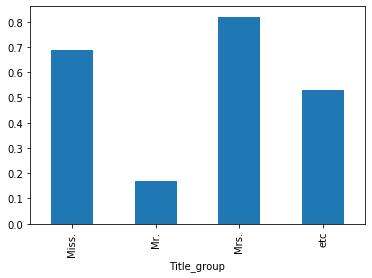

In [47]:
# 전처리된 데이터에서 Title_group의 각 값별로 생존률을 비교하기 위해 시각화 
train_tmp.groupby('Title_group')['Survived'].mean().plot(kind='bar')

## Q 3-2

```
전처리된 데이터에서 Fare가 0인 경우 'free'로, Fare 가 0 초과 66이하인 경우 'normal', Fare가 66초과인 경우 'outlier' 로 정의하여 Fare_group 변수를 생성하고, Fare_group의 각 값별로 생존률을 비교하고자 시각화 하시오. 

Fare_group이 ‘outlier’인 경우의 생존률(%)은 얼마인지 기술하시오. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오.

 (답안예시) 12.24
```

In [49]:
# 데이터에서 Fare가 0인 경우 'free'로, Fare 가 0 초과 66이하인 경우 'normal', 
# Fare가 66초과인 경우 'outlier' 로 정의하여 Fare_group 변수를 생성
def fare_group(x):
    # 코드입력
    if x == 0:
        return 'free'
    elif x <= 66:
        return 'normal'
    elif x > 66:
        return 'outlier'
    else:
        return x

In [50]:
train_tmp['Fare'].apply(fare_group).value_counts()

normal     500
outlier     84
free         8
Name: Fare, dtype: int64

In [51]:
train_tmp['Fare_group'] = train_tmp['Fare'].apply(fare_group)
train_tmp.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Embarked group Age_Bin Title Title_group  \
0      0  A/5 21171   7.2500        S     1   grown   Mr.         Mr.   
1      0   PC 17599  71.2833        C     1   grown  Mrs.        Mrs.   
3      0     113803  53.1000        S     1   grown  Mrs.        Mrs.   
4      0     373450   8.0500        S     1   grown   Mr.         Mr.   
6      0      17463  51.8625        S     1  senior   Mr.         Mr.   

  Fare_group  
0     normal  
1    outlier  
3     normal  
4     normal  
6     normal

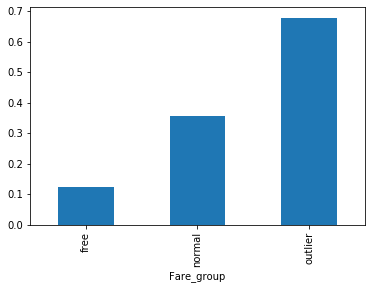

In [52]:
# Fare_group의 각 값별로 생존률을 비교하고자 시각화
train_tmp.groupby('Fare_group')['Survived'].mean().plot(kind='bar')

In [54]:
# Fare_group이 ‘outlier’인 경우의 생존률(%)은 얼마인지 기술하시오. 
# 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술
round(train_tmp.loc[train_tmp['Fare_group'] == 'outlier', 'Survived'].mean() * 100, 2)

67.86

**정답: 67.86**

## Q 4

```
training set 에 대해 Embarked가 공백인 행을 제거하고, 바로 사용이 불가한 Name, Ticket, 결측이 다량 보유된 Age, Cabin 변수를 제거한 후, Pclass, Sex, Sibsp, Parch, Embarked 를 One Hot Encoding(디폴트값 사용)를 활용해 파생변수를 생성 한 후, Logistic Reg.로 학습하시오.
```

In [55]:
# 바로 사용이 불가한 Name, Ticket, 결측이 다량 보유된 Age, Cabin 변수를 제거
df_features = df.drop(['Name', 'Ticket', 'Age', 'Cabin'], 1)
df_features.head()

PassengerId  Survived  Pclass     Sex  SibSp  Parch     Fare Embarked group
0            1         0       3    male      1      0   7.2500        S     1
1            2         1       1  female      1      0  71.2833        C     1
2            3         1       3  female      0      0   7.9250        S     2
3            4         1       1  female      1      0  53.1000        S     1
4            5         0       3    male      0      0   8.0500        S     1

In [56]:
# Pclass, Sex, SibSp, Parch, Embarked 를 One Hot Encoding(디폴트값 사용)를 활용해 파생변수를 생성
df_features[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']] = df_features[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].astype('str')
df_features_onehot = pd.get_dummies(df_features[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']])
df_features_onehot

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0           0         0         1           0         1        0        1   
1           1         0         0           1         0        0        1   
2           0         0         1           1         0        1        0   
3           1         0         0           1         0        0        1   
4           0         0         1           0         1        1        0   
..        ...       ...       ...         ...       ...      ...      ...   
886         0         1         0           0         1        1        0   
887         1         0         0           1         0        1        0   
888         0         0         1           1         0        0        1   
889         1         0         0           0         1        1        0   
890         0         0         1           0         1        1        0   

     SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0          0        0        0        0        0        1        0        0   
1          0        0        0        0        0        1        0        0   
2          0        0        0        0        0        1        0        0   
3          0        0        0        0        0        1        0        0   
4          0        0        0        0        0        1        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
886        0        0        0        0        0        1        0        0   
887        0        0        0        0        0        1        0        0   
888        0        0        0        0        0        0        0        1   
889        0        0        0        0        0        1        0        0   
890        0        0        0        0        0        1        0        0   

     Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0          0        0        0        0           0           0           1   
1          0        0        0        0           1           0           0   
2          0        0        0        0           0           0           1   
3          0        0        0        0           0           0           1   
4          0        0        0        0           0           0           1   
..       ...      ...      ...      ...         ...         ...         ...   
886        0        0        0        0           0           0           1   
887        0        0        0        0           0           0           1   
888        0        0        0        0           0           0           1   
889        0        0        0        0           1           0           0   
890        0        0        0        0           0           1           0   

     Embarked_nan  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
886             0  
887             0  
888             0  
889             0  
890             0  

[891 rows x 23 columns]

In [57]:
# train, test로 분할
train_onehot = df_features_onehot.iloc[train.index]
test_onehot = df_features_onehot.iloc[test.index]

In [58]:
# y 정의
train_y = train['Survived']
test_y = test['Survived']

In [59]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_reg = LogisticRegression(random_state=123)
logistic_reg.fit(train_onehot, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Q 4-1

```
test data set에 대해 training set에 적용한 One Hot Encoding을 적용하고 이 데이터를 training set 에 의해 적합된 모델에 넣어 모델을 평가할 때, 정확도(Accuracy, %)를 기술하시오. 

소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오. 
(답안예시) 80.24
```

In [60]:
logi_pred = logistic_reg.predict(test_onehot)
logi_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int6

In [62]:
# 정확도(Accuracy, %)를 기술
# 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오
# (답안예시) 80.24
# 코드입력
round((logi_pred == test_y).mean() * 100, 2)

80.47

## Q 4-2

```
같은 방식으로 SVM, XGB 모델을 각각 생성하고 모델을 평가할 때, 정확도를 비교하고, Logistic Reg., SVM, XGB 중 정확도가 가장 높은 모델은 무엇이며, 정확도(Accuracy, %)를 순서대로 기술하시오. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오.

(답안예시) Logistic Reg., 80.24
```

In [68]:
from sklearn.svm import SVC

In [69]:
# Support Vector Machine
svc = SVC(random_state=123)
# svc 학습
svc.fit(train_onehot, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
# SVM Accuracy 계산
svc_pred = svc.predict(test_onehot)
((svc_pred == test_y).mean() * 100).round(2)

79.12

In [71]:
from xgboost import XGBClassifier

In [72]:
# XGBOOST
xgb = XGBClassifier(random_state=123)
# xgb 학습
xgb.fit(train_onehot, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [73]:
# XGBOOST Accuracy 계산
xgb_pred = xgb.predict(test_onehot)
((xgb_pred == test_y).mean() * 100).round(2)

80.13

Logistic Regression, 80.47

## Q 5-1

```
다음 과정으로 age_group 변수의 결측값을 대체하고 질문에 답하시오.

1단계. training set 에 대해 Embarked가 공백인 행을 제거하고, 바로 사용이 불가한 Name, Ticket, 결측이 다량 보유된 Cabin 변수를 제거한다.
2단계. Pclass, Sex, Sibsp, Parch, Embarked 를 One Hot Encoding(디폴트값 사용)를 활용해 파생변수를 생성 한다. 
3단계. 그 결과에서 age가 결측이 아닌 데이터를 활용하여 age가 결측인 값을 예측하고자 한다. Age를 바로 예측하는 대신, Age_group(0이상 18미만을 ‘child’, 18이상 54미만을 ‘grown’으로, 54이상을 ‘senior’로 함)을 예측하고자 Age 변수를 범주화 한다. (앞서, Age_group 별로 생존율에 차이가 있는 것을 확인하였다.) 

(1) age가 결측이 아닌 데이터에 대해 XGB 모델을 학습하여, age가 결측이 아닌 데이터로 모델을 평가할 때, 정확도(Accuracy, %)를 기술하시오. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오. 
(답안예시) 80.24

(2) 실제 ‘grown’인 경우 ‘grown’으로 예측한 비율(0~1)을 기술하시오.. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오. 
(답안예시) 0.82
```

In [74]:
# df_features_onehot
df_features_onehot

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0           0         0         1           0         1        0        1   
1           1         0         0           1         0        0        1   
2           0         0         1           1         0        1        0   
3           1         0         0           1         0        0        1   
4           0         0         1           0         1        1        0   
..        ...       ...       ...         ...       ...      ...      ...   
886         0         1         0           0         1        1        0   
887         1         0         0           1         0        1        0   
888         0         0         1           1         0        0        1   
889         1         0         0           0         1        1        0   
890         0         0         1           0         1        1        0   

     SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0          0        0        0        0        0        1        0        0   
1          0        0        0        0        0        1        0        0   
2          0        0        0        0        0        1        0        0   
3          0        0        0        0        0        1        0        0   
4          0        0        0        0        0        1        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
886        0        0        0        0        0        1        0        0   
887        0        0        0        0        0        1        0        0   
888        0        0        0        0        0        0        0        1   
889        0        0        0        0        0        1        0        0   
890        0        0        0        0        0        1        0        0   

     Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0          0        0        0        0           0           0           1   
1          0        0        0        0           1           0           0   
2          0        0        0        0           0           0           1   
3          0        0        0        0           0           0           1   
4          0        0        0        0           0           0           1   
..       ...      ...      ...      ...         ...         ...         ...   
886        0        0        0        0           0           0           1   
887        0        0        0        0           0           0           1   
888        0        0        0        0           0           0           1   
889        0        0        0        0           1           0           0   
890        0        0        0        0           0           1           0   

     Embarked_nan  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
886             0  
887             0  
888             0  
889             0  
890             0  

[891 rows x 23 columns]

In [75]:
train.loc[train['Age'].notnull()].index

Int64Index([  0,   1,   3,   4,   6,   7,   9,  10,  12,  13,
            ...
            874, 876, 877, 879, 880, 882, 883, 885, 886, 889],
           dtype='int64', length=474)

In [78]:
train.loc[train['Age'].isnull()].index

Int64Index([ 19,  28,  31,  36,  42,  45,  46,  48,  55,  64,
            ...
            825, 826, 828, 832, 837, 846, 849, 859, 868, 888],
           dtype='int64', length=120)

In [79]:
# age가 결측이 아닌 데이터
x_train = df_features_onehot.loc[train.loc[train['Age'].notnull()].index]
y_train = df.loc[train.loc[train['Age'].notnull()].index, 'Survived']

In [80]:
# age가 결측치인 데이터
x_test = df_features_onehot.loc[train.loc[train['Age'].isnull()].index]
y_test = df.loc[train.loc[train['Age'].isnull()].index, 'Survived']

In [81]:
# XGBOOST
xgb = XGBClassifier(random_state=123)
# xgb 학습
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [82]:
prediction = xgb.predict(x_test)

In [83]:
(prediction == y_test).mean()

0.825

## Q 5-2

```
실제 ‘grown’인 경우 ‘grown’으로 예측한 비율(0~1)을 기술하시오. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오. 

(답안예시) 0.82
```

In [84]:
train['Age_Bin'].value_counts()

grown     366
child      72
senior     36
Name: Age_Bin, dtype: int64

In [85]:
# x_train 정의
x_train = train_onehot
x_train

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0           0         0         1           0         1        0        1   
1           1         0         0           1         0        0        1   
3           1         0         0           1         0        0        1   
4           0         0         1           0         1        1        0   
6           1         0         0           0         1        1        0   
..        ...       ...       ...         ...       ...      ...      ...   
883         0         1         0           0         1        1        0   
885         0         0         1           1         0        1        0   
886         0         1         0           0         1        1        0   
888         0         0         1           1         0        0        1   
889         1         0         0           0         1        1        0   

     SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0          0        0        0        0        0        1        0        0   
1          0        0        0        0        0        1        0        0   
3          0        0        0        0        0        1        0        0   
4          0        0        0        0        0        1        0        0   
6          0        0        0        0        0        1        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
883        0        0        0        0        0        1        0        0   
885        0        0        0        0        0        0        0        0   
886        0        0        0        0        0        1        0        0   
888        0        0        0        0        0        0        0        1   
889        0        0        0        0        0        1        0        0   

     Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0          0        0        0        0           0           0           1   
1          0        0        0        0           1           0           0   
3          0        0        0        0           0           0           1   
4          0        0        0        0           0           0           1   
6          0        0        0        0           0           0           1   
..       ...      ...      ...      ...         ...         ...         ...   
883        0        0        0        0           0           0           1   
885        0        0        1        0           0           1           0   
886        0        0        0        0           0           0           1   
888        0        0        0        0           0           0           1   
889        0        0        0        0           1           0           0   

     Embarked_nan  
0               0  
1               0  
3               0  
4               0  
6               0  
..            ...  
883             0  
885             0  
886             0  
888             0  
889             0  

[594 rows x 23 columns]

In [86]:
train.loc[train_onehot.index, 'Age_Bin']

0       grown
1       grown
3       grown
4       grown
6      senior
        ...  
883     grown
885     grown
886     grown
888       NaN
889     grown
Name: Age_Bin, Length: 594, dtype: object

In [87]:
age_bin_map = {
    'grown': 1, 
    'senior': 0, 
    'child': 0, 
    np.nan: 0,
}

In [88]:
# Age_Bin 을 Numerical Value로 변환
y_train = train.loc[train_onehot.index, 'Age_Bin'].map(age_bin_map)
y_train

0      1
1      1
3      1
4      1
6      0
      ..
883    1
885    1
886    1
888    0
889    1
Name: Age_Bin, Length: 594, dtype: int64

In [89]:
# x_test 정의
x_test = test_onehot
x_test

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
2           0         0         1           1         0        1        0   
5           0         0         1           0         1        1        0   
8           0         0         1           1         0        1        0   
11          1         0         0           1         0        1        0   
14          0         0         1           1         0        1        0   
..        ...       ...       ...         ...       ...      ...      ...   
878         0         0         1           0         1        1        0   
881         0         0         1           0         1        1        0   
884         0         0         1           0         1        1        0   
887         1         0         0           1         0        1        0   
890         0         0         1           0         1        1        0   

     SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
2          0        0        0        0        0        1        0        0   
5          0        0        0        0        0        1        0        0   
8          0        0        0        0        0        0        0        1   
11         0        0        0        0        0        1        0        0   
14         0        0        0        0        0        1        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
878        0        0        0        0        0        1        0        0   
881        0        0        0        0        0        1        0        0   
884        0        0        0        0        0        1        0        0   
887        0        0        0        0        0        1        0        0   
890        0        0        0        0        0        1        0        0   

     Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
2          0        0        0        0           0           0           1   
5          0        0        0        0           0           1           0   
8          0        0        0        0           0           0           1   
11         0        0        0        0           0           0           1   
14         0        0        0        0           0           0           1   
..       ...      ...      ...      ...         ...         ...         ...   
878        0        0        0        0           0           0           1   
881        0        0        0        0           0           0           1   
884        0        0        0        0           0           0           1   
887        0        0        0        0           0           0           1   
890        0        0        0        0           0           1           0   

     Embarked_nan  
2               0  
5               0  
8               0  
11              0  
14              0  
..            ...  
878             0  
881             0  
884             0  
887             0  
890             0  

[297 rows x 23 columns]

In [90]:
# Age_Bin 을 Numerical Value로 변환
y_test = test.loc[test_onehot.index, 'Age_Bin'].map(age_bin_map)
y_test

2      1
5      0
8      1
11     0
14     0
      ..
878    0
881    1
884    1
887    1
890    1
Name: Age_Bin, Length: 297, dtype: int64

In [91]:
# XGBOOST
xgb = XGBClassifier(random_state=123)
# xgb 학습
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [92]:
prediction = xgb.predict(x_test)

In [93]:
(prediction == y_test).mean()

0.7272727272727273

## Q 6

```
다음 과정으로 모델링을 수행하고 질문에 답하시오.

1단계.  training set에서 age 가 결측인 경우는 예측된 age_group 으로, 결측이 아닌 경우는 실제 age_group 으로 한다. age_group 변수를 One Hot Encoding 하여 Logistic Reg., SVM, XGB 모델을 적합한다.
2단계.  Test set에 대해서도 Embarked 가 공백인 경우를 제외한 것에 대해서만 생존여부를 예측하고자 한다. Training set에 적용한 Pclass, Sex, Sibsp, Parch, Embarked 를 One Hot Encoding(디폴트값 사용) 결과를 test set에도 동일하게 적용한다. 
3단계.  b 결과에 Age_group 변수를 생성하고 Age가 결측인 경우(Age_group 가 결측인 경우), 1번에서 생성한 XGB 모델(age가 결측인 경우, Age_group을 대체하는 모델)을 사용하여 Age_group 결측을 대체한다. 
4단계. c의 결과에 age_group 변수에 대해 training set에서 age_group 의 One Hot Encoding결과를 적용한다.

1~4단계를 거친 Test 데이터로 a 에서 학습된 모델 Logistic Reg., SVM, XGB 을 평가할 때, 정확도가 가장 높은 모델의 정확도(Accuracy, %)를 기술하시오. 소수점 셋째 자리에서 반올림 하여 둘째 자리까지 기술하시오. 
(답안예시) 80.24
```

In [94]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Cabin Embarked group Age_Bin  
0      0  A/5 21171   7.2500   NaN        S     1   grown  
1      0   PC 17599  71.2833   C85        C     1   grown  
3      0     113803  53.1000  C123        S     1   grown  
4      0     373450   8.0500   NaN        S     1   grown  
6      0      17463  51.8625   E46        S     1  senior

In [95]:
test.head()

PassengerId  Survived  Pclass  \
2             3         1       3   
5             6         0       3   
8             9         1       3   
11           12         1       1   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
2                              Heikkinen, Miss. Laina  female  26.0      0   
5                                    Moran, Mr. James    male   NaN      0   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked group Age_Bin  
2       0  STON/O2. 3101282   7.9250   NaN        S     2   grown  
5       0            330877   8.4583   NaN        Q     2     NaN  
8       2            347742  11.1333   NaN        S     2   grown  
11      0            113783  26.5500  C103        S     2  senior  
14      0            350406   7.8542   NaN        S     2   child

In [96]:
train_age_1 = train.loc[train['Age'].notnull()]
train_age_0 = train.loc[train['Age'].isnull()]
test_age_1 = test.loc[test['Age'].notnull()]
test_age_0 = test.loc[test['Age'].isnull()]

In [97]:
# Age를 Age_group(0이상 18미만을 ‘child’, 18이상 54미만을 ‘grown’으로, 54이상을 ‘senior’로 함)으로 나누어
def age_bin(x):
    if x < 18:
        return 'child'
    elif (x >= 18) and (x < 54):
        return 'grown'
    elif (x >= 54):
        return 'senior'
    else:
        return np.nan

In [98]:
age_bin_map = {
    'child': 0, 
    'grown': 1, 
    'senior': 2, 
}

In [99]:
train_age_1['age_group'] = train_age_1['Age'].apply(age_bin)
test_age_1['age_group'] = test_age_1['Age'].apply(age_bin)

In [100]:
train_age_1['age_group'] = train_age_1['age_group'].map(age_bin_map)
test_age_1['age_group'] = test_age_1['age_group'].map(age_bin_map)

In [101]:
train_age_1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
3            4         1       1   
4            5         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch     Ticket     Fare Cabin Embarked group Age_Bin  age_group  
0      0  A/5 21171   7.2500   NaN        S     1   grown          1  
1      0   PC 17599  71.2833   C85        C     1   grown          1  
3      0     113803  53.1000  C123        S     1   grown          1  
4      0     373450   8.0500   NaN        S     1   grown          1  
6      0      17463  51.8625   E46        S     1  senior          2

In [102]:
train_age_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          349
Embarked         2
group            0
Age_Bin          0
age_group        0
dtype: int64

In [103]:
# training set의 age_bin 결측치 예측 데이터셋 구성
x_train = df_features_onehot.loc[train_age_1.index]
y_train = train_age_1['age_group']

x_test = df_features_onehot.loc[train_age_0.index]

In [104]:
xgb = XGBClassifier(random_state=123)
pred = xgb.fit(x_train, y_train).predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [105]:
train_age_0['age_group'] = pred
train_age_0['age_group'].isnull().sum()

0

In [106]:
# Test set에 대해서도 Embarked 가 공백인 경우를 제외한 것에 대해서만 생존여부를 예측
test['Embarked'].isnull().sum()

0

In [107]:
# test set의 Age_group 결측을 대체
x_test = df_features_onehot.loc[test_age_0.index]

In [108]:
pred = xgb.predict(x_test)
test_age_0['age_group'] = pred
test_age_0.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            57
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          49
Embarked        0
group           0
Age_Bin        57
age_group       0
dtype: int64

In [109]:
train.loc[train_age_1.index, 'age_group'] = train_age_1['age_group']
train.loc[train_age_0.index, 'age_group'] = train_age_0['age_group']
test.loc[test_age_1.index, 'age_group'] = test_age_1['age_group']
test.loc[test_age_0.index, 'age_group'] = test_age_0['age_group']
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            120
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          458
Embarked         2
group            0
Age_Bin        120
age_group        0
dtype: int64

In [110]:
train_age_onehot = pd.get_dummies(train['age_group'], prefix='age_group')
test_age_onehot = pd.get_dummies(test['age_group'], prefix='age_group')
train_age_onehot.head()

age_group_0.0  age_group_1.0  age_group_2.0
0              0              1              0
1              0              1              0
3              0              1              0
4              0              1              0
6              0              0              1

In [111]:
train_onehot.head()

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0         0         0         1           0         1        0        1   
1         1         0         0           1         0        0        1   
3         1         0         0           1         0        0        1   
4         0         0         1           0         1        1        0   
6         1         0         0           0         1        1        0   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   
6        0        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0        0        0        0        0           0           0           1   
1        0        0        0        0           1           0           0   
3        0        0        0        0           0           0           1   
4        0        0        0        0           0           0           1   
6        0        0        0        0           0           0           1   

   Embarked_nan  
0             0  
1             0  
3             0  
4             0  
6             0

In [112]:
train_onehot = pd.concat([train_onehot, train_age_onehot], 1)
test_onehot = pd.concat([test_onehot, test_age_onehot], 1)
train_onehot.head()

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  SibSp_0  SibSp_1  \
0         0         0         1           0         1        0        1   
1         1         0         0           1         0        0        1   
3         1         0         0           1         0        0        1   
4         0         0         1           0         1        1        0   
6         1         0         0           0         1        1        0   

   SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_0  Parch_1  Parch_2  \
0        0        0        0        0        0        1        0        0   
1        0        0        0        0        0        1        0        0   
3        0        0        0        0        0        1        0        0   
4        0        0        0        0        0        1        0        0   
6        0        0        0        0        0        1        0        0   

   Parch_3  Parch_4  Parch_5  Parch_6  Embarked_C  Embarked_Q  Embarked_S  \
0        0        0        0        0           0           0           1   
1        0        0        0        0           1           0           0   
3        0        0        0        0           0           0           1   
4        0        0        0        0           0           0           1   
6        0        0        0        0           0           0           1   

   Embarked_nan  age_group_0.0  age_group_1.0  age_group_2.0  
0             0              0              1              0  
1             0              0              1              0  
3             0              0              1              0  
4             0              0              1              0  
6             0              0              0              1

In [113]:
x_train = train_onehot
y_train = train['Survived']
x_test = test_onehot
y_test = test['Survived']

In [114]:
# Logistic Regression
logi = LogisticRegression(random_state=123)
# Logistic Regression 학습
pred = logi.fit(x_train, y_train).predict(x_test)
accuracy = (pred == y_test).mean()
print(f'Logistic Regression: {accuracy*100:.2f}')

Logistic Regression: 80.13


In [115]:
# SVM
svc = SVC(random_state=123)
# xgb 학습
pred = svc.fit(x_train, y_train).predict(x_test)
accuracy = (pred == y_test).mean()
print(f'SVM: {accuracy*100:.2f}')

SVM: 79.12


In [116]:
# XGBOOST
xgb = XGBClassifier(random_state=123)
# xgb 학습
pred = xgb.fit(x_train, y_train).predict(x_test)
accuracy = (pred == y_test).mean()
print(f'XGB: {accuracy*100:.2f}')

XGB: 81.82


**정답: XGBoost, 81.82**